<a href="https://colab.research.google.com/github/mel0ca/Traffic-Analysis/blob/main/IVT-Pattern-Across-Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ad Traffic Analysis
**Objective :**
This analysis focuses on examining ad traffic patterns across six different applications to uncover the underlying reasons behind invalid traffic (IVT) classification. The goal is to identify what specific behaviors, metrics, or anomalies lead certain apps to be flagged as early or late IVT while others maintain legitimate traffic status. By comparing these patterns, the study aims to provide a clear understanding of the distinguishing factors between IVT and non-IVT traffic.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
url = "https://docs.google.com/spreadsheets/d/1MTnRFZvwCDI1lnrKsQXau-zqcPzDpkg_wsnkP0wkcaA/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)

print("Loaded Data")
df.head()

Loaded Data


,Unnamed: 0,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaN,NaN,1191603,1189884,28,1770702,1.485983,0,0,1.001445,42557.250000,0.004276
1,NaN,2025-09-11 0:00:00,93345,93340,22,99280,1.063581,0,0,1.000054,4242.954545,0.003456
2,NaN,2025-09-12 0:00:00,515646,515307,25,649515,1.259614,0,0,1.000658,20625.840000,0.003409
3,NaN,2025-09-13 0:00:00,406993,406729,25,473346,1.163032,0,0,1.000649,16279.720000,0.006033
4,NaN,2025-09-14 0:00:00,400917,400668,26,467152,1.165209,0,0,1.000621,15419.884620,0.003836


Data Cleaning: Removing extra spaces

In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

Date to datetime conversion

In [ ]:
# Date to datetime
df['Total Data Date'] = pd.to_datetime(df['Total Data Date'], errors='coerce')

In [ ]:
df.head()

,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaT,1191603,1189884,28,1770702,1.485983,0,0,1.001445,42557.250000,0.004276
1,2025-09-11,93345,93340,22,99280,1.063581,0,0,1.000054,4242.954545,0.003456
2,2025-09-12,515646,515307,25,649515,1.259614,0,0,1.000658,20625.840000,0.003409
3,2025-09-13,406993,406729,25,473346,1.163032,0,0,1.000649,16279.720000,0.006033
4,2025-09-14,400917,400668,26,467152,1.165209,0,0,1.000621,15419.884620,0.003836


In [ ]:
# Checking for Missing values
print(df.isnull().sum())

Total Data Date         1
unique_idfas            0
unique_ips              0
unique_uas              0
total_requests          0
requests_per_idfa       0
impressions             0
impressions_per_idfa    0
idfa_ip_ratio           0
idfa_ua_ratio           0
IVT                     0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Total Data Date       89 non-null     datetime64[ns]
 1   unique_idfas          90 non-null     int64         
 2   unique_ips            90 non-null     int64         
 3   unique_uas            90 non-null     int64         
 4   total_requests        90 non-null     int64         
 5   requests_per_idfa     90 non-null     float64       
 6   impressions           90 non-null     int64         
 7   impressions_per_idfa  90 non-null     int64         
 8   idfa_ip_ratio         90 non-null     float64       
 9   idfa_ua_ratio         90 non-null     float64       
 10  IVT                   90 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 7.9 KB
None


In [ ]:
df.describe()

,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
count,89,9.000000e+01,9.000000e+01,90.000000,9.000000e+01,90.000000,90.0,90.0,90.000000,90.000000,90.000000
mean,2025-09-13 07:04:43.146067200,4.867137e+04,4.864164e+04,19.433333,5.902340e+04,1.042722,0.0,0.0,1.000079,2098.501077,0.004257
min,2025-09-11 00:00:00,3.535000e+03,3.535000e+03,17.000000,3.577000e+03,1.004514,0.0,0.0,1.000000,207.941177,0.000000
25%,2025-09-12 10:00:00,9.190000e+03,9.190000e+03,18.000000,9.550000e+03,1.013430,0.0,0.0,1.000000,501.333333,0.000000
50%,2025-09-13 07:00:00,1.375300e+04,1.375300e+04,19.000000,1.401250e+04,1.028146,0.0,0.0,1.000000,745.923445,0.004260
75%,2025-09-14 04:00:00,2.268400e+04,2.268075e+04,20.000000,2.349550e+04,1.045899,0.0,0.0,1.000078,1137.791667,0.006250
max,2025-09-15 01:00:00,1.191603e+06,1.189884e+06,28.000000,1.770702e+06,1.485983,0.0,0.0,1.001445,42557.250000,0.017391
std,NaN,1.452255e+05,1.450471e+05,2.088223,2.059180e+05,0.060474,0.0,0.0,0.000193,5327.754203,0.004225


#### Basic Observations

1. Unique Devices vs IPs -
Most apps have nearly equal unique IDFAs and IPs, indicating normal traffic distribution.

2. User-Agent Diversity -
Very low diversity (17–28 types) in some apps -> multiple devices using the same User-Agent, a strong indicator of device spoofing.

3. Requests per IDFA -
Average ~1.04 -> each device sends ~1 request, consistent for genuine traffic.

4. Impressions -
Mostly zero, meaning many requests did not result in actual ad delivery -> suspicious or non-human traffic.

5. IDFA-UA Ratio -
Extremely high in IVT-marked apps (up to 42,557), showing clustering of many devices under few User-Agents — key factor for IVT detection.

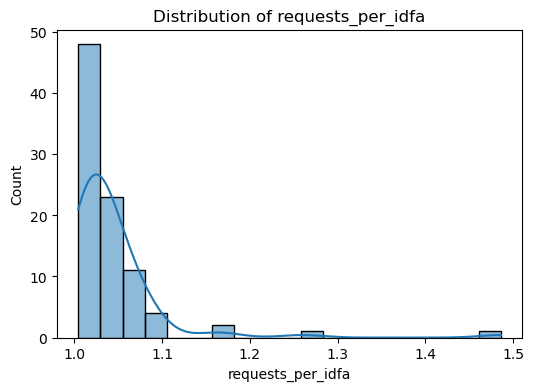

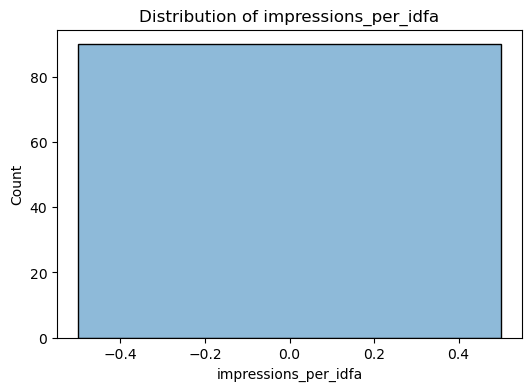

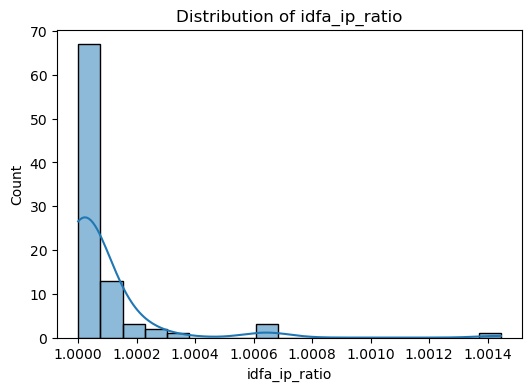

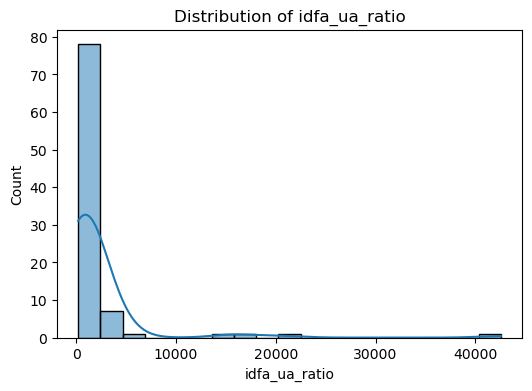

In [ ]:
ratios = ['requests_per_idfa', 'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio']

for col in ratios:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

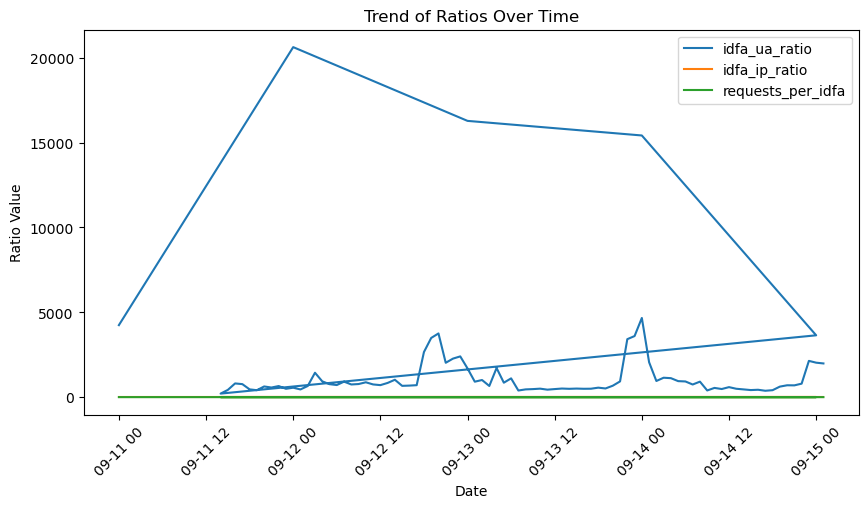

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Total Data Date'], df['idfa_ua_ratio'], label='idfa_ua_ratio')
plt.plot(df['Total Data Date'], df['idfa_ip_ratio'], label='idfa_ip_ratio')
plt.plot(df['Total Data Date'], df['requests_per_idfa'], label='requests_per_idfa')
plt.legend()
plt.title("Trend of Ratios Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()


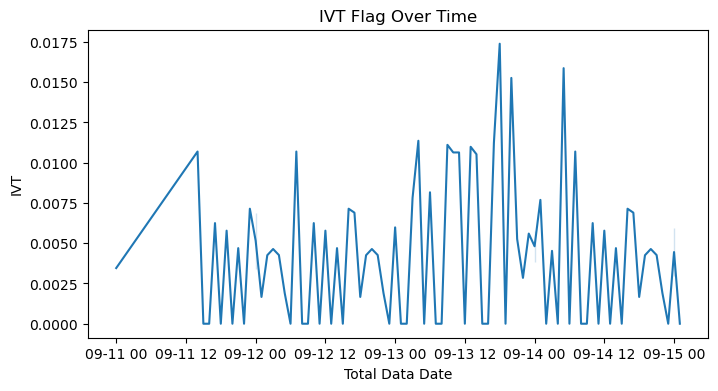

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Total Data Date', y='IVT')
plt.title("IVT Flag Over Time")
plt.show()

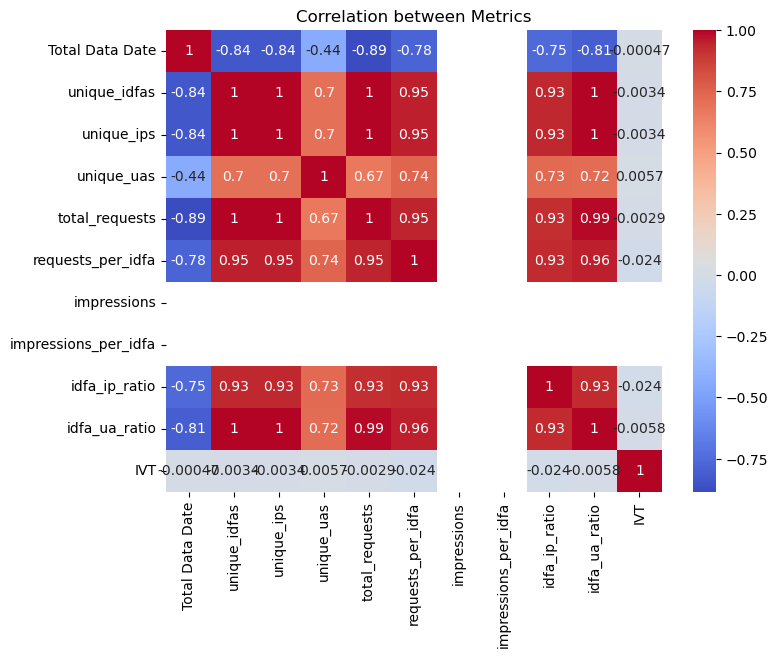

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Metrics")
plt.show()

**Patterns Leading to IVT**

* Non-IVT Apps:
Stable request patterns, low IDFA-UA ratio, no abnormal spikes, consistent traffic → never flagged.

* Early-IVT Apps:
Sudden spikes in idfa_ua_ratio and request volume → flagged by system quickly.

* Late-IVT Apps:
Gradual increase in device clustering and traffic anomalies → flagged later.

* Common Factor:
High IDFA-UA ratio + zero impressions + sudden request surges correlate strongly with IVT marking.

### Graph-Based Insights

* Requests per IDFA: Mostly stable (~1), minor variations.
* Impressions per IDFA: Flat at 0 -> indicates fake or unserved requests.
* IDFA-IP Ratio: ~1 across apps -> normal, not a IVT factor.
* IDFA-UA Ratio: Shows large spikes in IVT apps -> clear signal for detection.
* IVT Trend: Peaks correspond with high idfa_ua_ratio -> strong visual correlation between device spoofing and IVT marking.


##### Conclusion

* The IVT system flags apps based on abnormal traffic patterns, particularly:

   * High device clustering under same User-Agent
   * Request surges without real impressions
   * Rapid changes in traffic metrics

Apps that maintain stable traffic with low IDFA-UA ratios remain non-IVT, while those showing suspicious clustering and request spikes get marked IVT earlier or later depending on when the anomaly occurs.